<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CUxx_Nombre del caso de uso</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>12.01.- EDA - Univariate Analysis</font>

<font color='steelblue'>Univariate descriptive analysis.</font>


## <font color='steelblue'>Tasks</font>

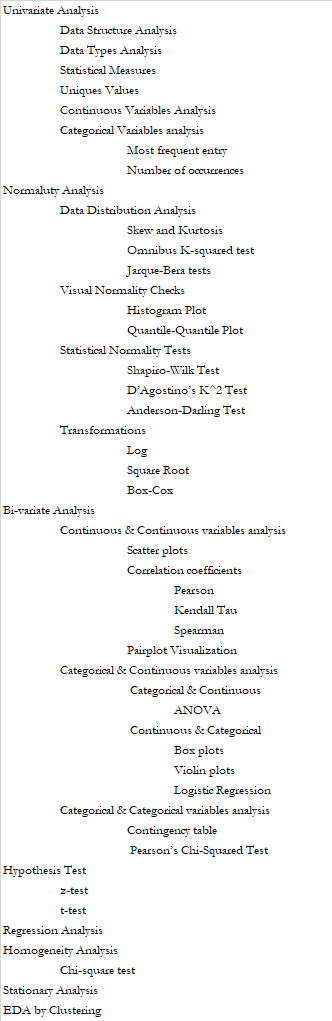
    


## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: xxxxxxxxxx</font>
- <font color='steelblue'> <b>Output File: xxxxxxxxxx</font>

## <font color='green'>Settings</font>

In [1]:
# Libraries to use
import os
from pathlib import Path
import pandas as pd
import easygui as GUI
from matplotlib import pyplot as plt
import seaborn as sns
import dabl
import pandas_profiling as pp
from datatile.summary.df import DataFrameSummary
import klib
import dabl
import plotly.express as px

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Uso de la librería "easygui" para mayor comodidad</font>

In [2]:
# Data load using "easygui" library
file_data=GUI.fileopenbox(title='Open Data File', default="Data/Input/", filetypes="*.*")

<font color='tomato'>Utilizamos en todos los notebooks SIEMPRE <b>data</b> como nombre de la matriz (dataframe) principal donde cargamos los datos.</font>

In [2]:
# Data file to dataframe
data = pd.read_csv(file_data)

NameError: name 'pd' is not defined

In [3]:
data.head()

NameError: name 'data' is not defined

<font color='tomato'><b> OPCION B:</b> Directamente</font>

In [2]:
file_name='diabetes.csv'
data = pd.read_csv('Data/Input/'+file_name)

<font color='tomato'>Visualizo los datos.</font>

In [1]:
data

NameError: name 'data' is not defined

## Data Structure

In [32]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0,0.53,2,157,3,0,0,sales,low,1
1,0,0.86,5,262,6,0,0,sales,medium,1
2,0,0.88,7,272,4,0,0,sales,medium,1
3,0,0.87,5,223,5,0,0,sales,low,1
4,0,0.52,2,159,3,0,0,sales,low,1


**Tamaño** de los datos

In [16]:
data.shape

(14999, 10)

**Tamaño de Memoria** de los datos

In [33]:
data.memory_usage()

Index                       128
satisfaction_level       119992
last_evaluation          119992
number_project           119992
average_montly_hours     119992
time_spend_company       119992
Work_accident            119992
promotion_last_5years    119992
department                15379
salary                    15131
left                     119992
dtype: int64

**Structure of non-numerical features**

In [17]:
# Display non-numerical features
data.select_dtypes(exclude="number").head()

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [18]:
data.describe(exclude='number')

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


**Structure of numerical features**

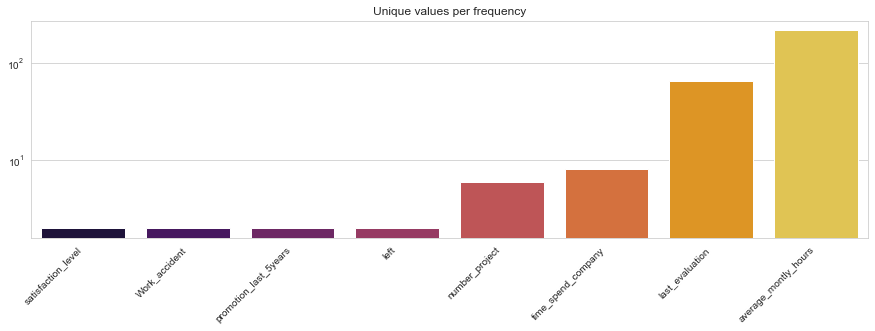

In [34]:
# For each numerical feature compute number of unique entries
unique_values = data.select_dtypes(include='number').nunique().sort_values()
plt.figure(figsize=(15, 4))
sns.set_style('whitegrid')

g = sns.barplot(x=unique_values.index, y=unique_values, palette='inferno')
g.set_yscale("log")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Unique values per frequency')
plt.show()

## Data Types

**Tipo** de datos

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  int64  
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 1.1+ MB


In [73]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
department                object
salary                    object
left                       int64
dtype: object

In [75]:
loan_clean = dabl.clean(data, verbose=0)
types = dabl.detect_types(loan_clean)
types

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
satisfaction_level,True,False,False,False,False,False,False
last_evaluation,True,False,False,False,False,False,False
number_project,False,False,True,False,False,False,False
average_montly_hours,True,False,False,False,False,False,False
time_spend_company,False,False,True,False,False,False,False
Work_accident,False,False,False,True,False,False,False
department,False,False,False,True,False,False,False
salary,False,False,False,True,False,False,False
left,False,False,False,True,False,False,False


In [75]:
loan_clean = dabl.clean(data, verbose=0)
types = dabl.detect_types(loan_clean)
types

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
satisfaction_level,True,False,False,False,False,False,False
last_evaluation,True,False,False,False,False,False,False
number_project,False,False,True,False,False,False,False
average_montly_hours,True,False,False,False,False,False,False
time_spend_company,False,False,True,False,False,False,False
Work_accident,False,False,False,True,False,False,False
department,False,False,False,True,False,False,False
salary,False,False,False,True,False,False,False
left,False,False,False,True,False,False,False


In [22]:
# Changing 'object' type by 'category' type
data['department'] = data['department'].astype('category')
data['salary'] = data['salary'].astype('category')

In [23]:
data.dtypes

satisfaction_level          int64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
promotion_last_5years       int64
department               category
salary                   category
left                        int64
dtype: object

## Statistical Measures

In [77]:
# Máximo
data.max()

satisfaction_level             1.0
last_evaluation                1.0
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
promotion_last_5years            1
department               technical
salary                      medium
left                             1
dtype: object

In [78]:
# Mínimo
data.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
promotion_last_5years       0
department                 IT
salary                   high
left                        0
dtype: object

In [79]:
# Suma de valores
data.sum()

satisfaction_level                                                 9191.89
last_evaluation                                                   10740.81
number_project                                                       57042
average_montly_hours                                               3015554
time_spend_company                                                   52470
Work_accident                                                         2169
promotion_last_5years                                                  319
department               salessalessalessalessalessalessalessalessaless...
salary                   lowmediummediumlowlowlowlowlowlowlowlowlowlowl...
left                                                                  3571
dtype: object

In [4]:
# Análisis estadístico primario
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [3]:
# Análisis estadístico primario
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,NaN,NaN,NaN,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,NaN,NaN,NaN,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,NaN,NaN,NaN,3.803054,1.232592,2.0,3.0,4.0,5.0,7.0
average_montly_hours,14999.0,NaN,NaN,NaN,201.050337,49.943099,96.0,156.0,200.0,245.0,310.0
time_spend_company,14999.0,NaN,NaN,NaN,3.498233,1.460136,2.0,3.0,3.0,4.0,10.0
Work_accident,14999.0,NaN,NaN,NaN,0.14461,0.351719,0.0,0.0,0.0,0.0,1.0
promotion_last_5years,14999.0,NaN,NaN,NaN,0.021268,0.144281,0.0,0.0,0.0,0.0,1.0
department,14999,10,sales,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,14999,3,low,7316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
left,14999.0,NaN,NaN,NaN,0.238083,0.425924,0.0,0.0,0.0,0.0,1.0


In [5]:
# Análisis estadístico primario
dfs = DataFrameSummary(data)
dfs.summary()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
count,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,NaN,NaN,14999.0
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.14461,0.021268,NaN,NaN,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,NaN,NaN,0.425924
min,0.09,0.36,2.0,96.0,2.0,0.0,0.0,NaN,NaN,0.0
25%,0.44,0.56,3.0,156.0,3.0,0.0,0.0,NaN,NaN,0.0
50%,0.64,0.72,4.0,200.0,3.0,0.0,0.0,NaN,NaN,0.0
75%,0.82,0.87,5.0,245.0,4.0,0.0,0.0,NaN,NaN,0.0
max,1.0,1.0,7.0,310.0,10.0,1.0,1.0,NaN,NaN,1.0
counts,14999,14999,14999,14999,14999,14999,14999,14999,14999,14999
uniques,92,65,6,215,8,2,2,10,3,2


## Uniques values

In [6]:
# Rthe number of unique values in each column.
data.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
promotion_last_5years      2
department                10
salary                     3
left                       2
dtype: int64

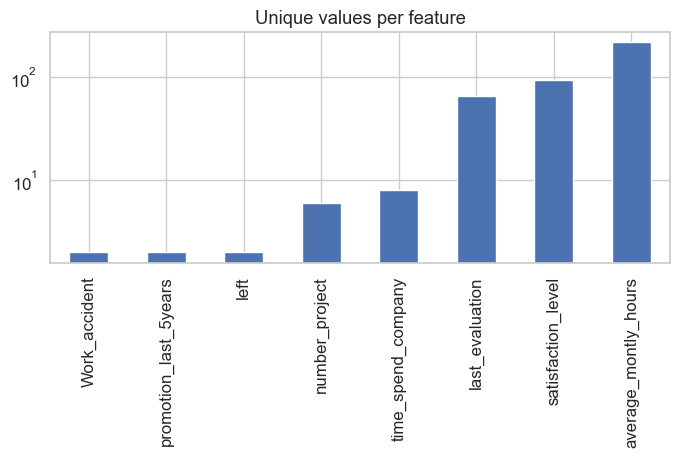

In [84]:
# For each numerical feature compute number of unique entries
unique_values = data.select_dtypes(
  include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(8, 3),
                       title="Unique values per feature");

## CrossTab

<font color='tomato'>Select columns</font>

In [9]:
Column1= data.time_spend_company
Column2= data.department 

<font color='darkgrey'><b>Operation</font>

In [10]:
# Referencia cruzada de variables
pd.crosstab(Column1,Column2)

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
time_spend_company,,,,,,,,,,
2,268,181,142,162,114,171,201,902,515,588
3,523,341,335,333,240,382,386,1768,974,1161
4,215,132,160,122,91,141,149,666,364,517
5,131,81,75,75,43,71,91,403,229,274
6,52,42,31,41,20,51,39,185,109,148
7,12,0,0,0,36,10,18,110,0,2
8,10,10,14,6,24,20,8,48,12,10
10,16,0,10,0,62,12,10,58,26,20


##	Analyzing Numerical Variables 

### Selecting continuous variables

In [35]:
# Numeric colums
num_cols = data.select_dtypes(include=['number']).columns.tolist()
num_cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'left']

In [36]:
# Numeric colums
data_num = data[num_cols]
data_num

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,0,0.53,2,157,3,0,0,1
1,0,0.86,5,262,6,0,0,1
2,0,0.88,7,272,4,0,0,1
3,0,0.87,5,223,5,0,0,1
4,0,0.52,2,159,3,0,0,1
...,...,...,...,...,...,...,...,...
14994,0,0.57,2,151,3,0,0,1
14995,0,0.48,2,160,3,0,0,1
14996,0,0.53,2,143,3,0,0,1
14997,0,0.96,6,280,4,0,0,1


### Global view of the numerical variables

Global view on the dataset to identify some very unusual patterns.

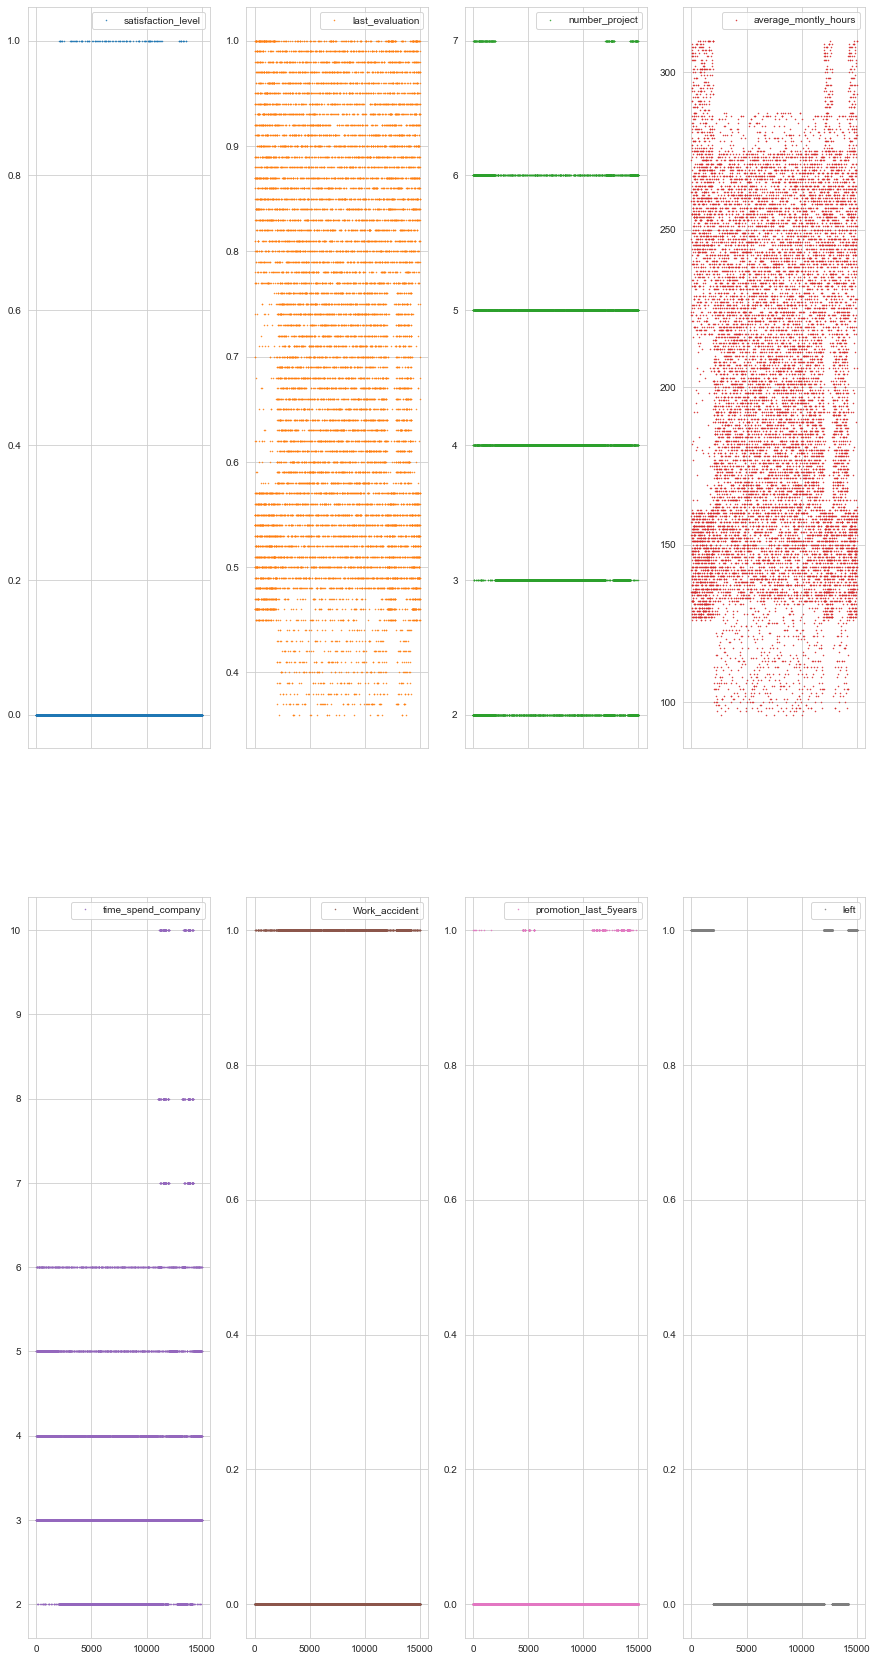

In [37]:
data_num.plot(lw=0,
          marker=".",
          subplots=True,
          layout=(-1, 4),
          figsize=(15, 30),
          markersize=1);

### Visualising Mean, median and mode

<font color='tomato'>Select column</font>

In [32]:
column='satisfaction_level'

<font color='darkgrey'><b>Operation</font>

<function matplotlib.pyplot.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)>

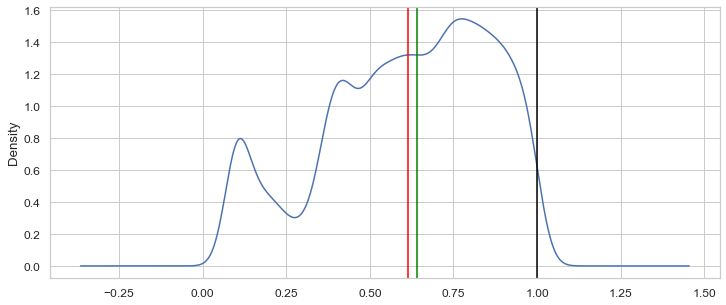

In [41]:
plt.figure(figsize=(12,5))
data_num[column].plot(kind='density')
plt.axvline(data_num[column].mean(),label='mean',color='Red')
plt.axvline(data_num[column].median(),label='median',color='Green')
plt.axvline(data_num[column].mode(dropna=False).all(),label='mode',color='Black')
plt.boxplot

### Histograms

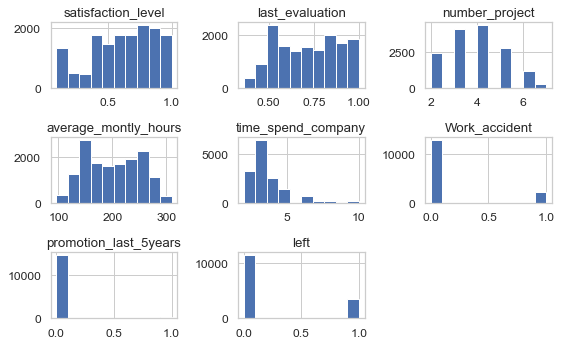

In [64]:
data_num.hist()
plt.tight_layout()

<font color='tomato'>Select column</font>

In [58]:
# Select column
column = data_num['satisfaction_level']

<font color='darkgrey'><b>Operation</font>

<AxesSubplot:xlabel='satisfaction_level', ylabel='Count'>

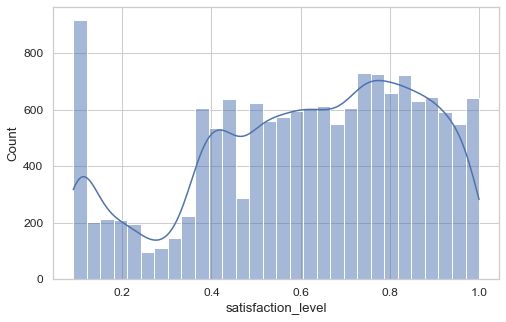

In [61]:
sns.histplot(data=data_num, x=column, kde=True)

### Box plot 

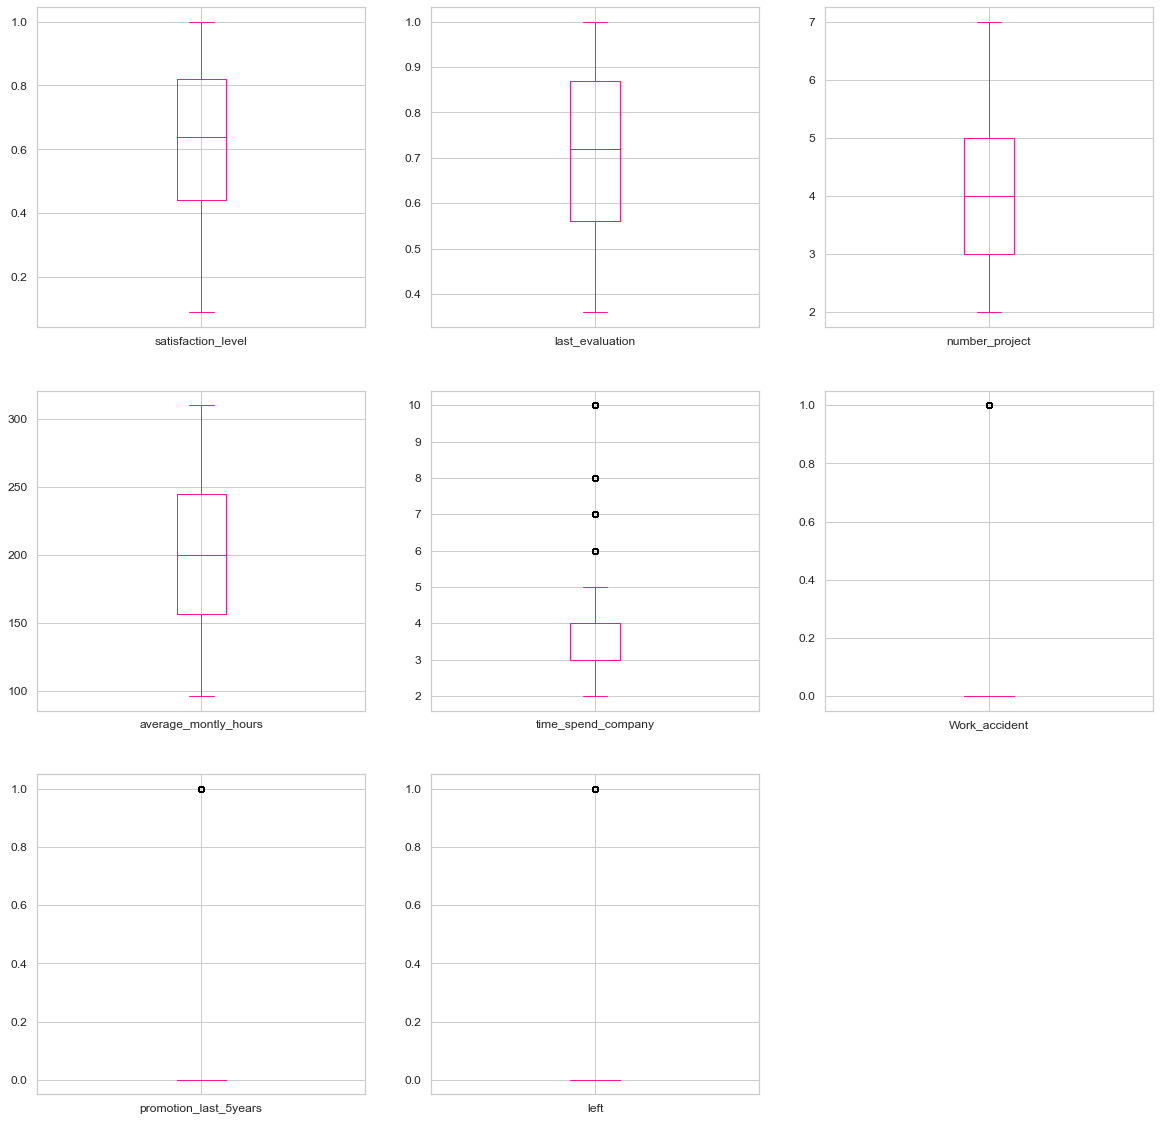

In [20]:
x=data_num.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20, 20), color='deeppink')

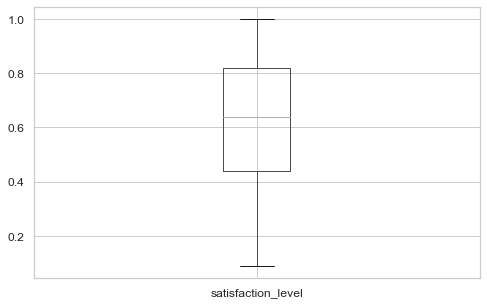

In [21]:
boxplot = data_num.boxplot(column=['satisfaction_level'])

### Violin plot 

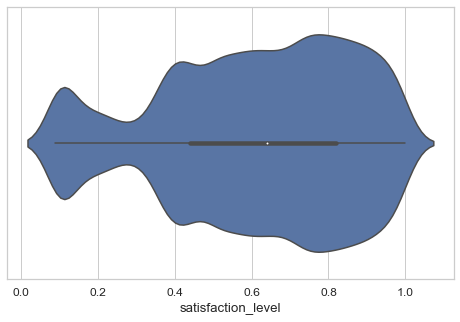

In [22]:
x = sns.violinplot(x=data_num["satisfaction_level"])

### Distribution plot 

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='time_spend_company', ylabel='Density'>

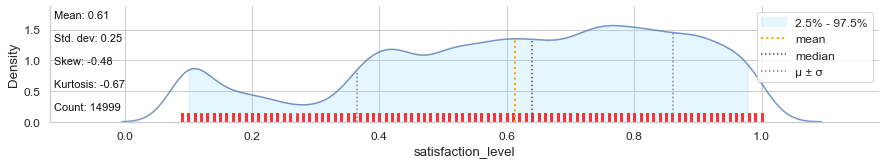

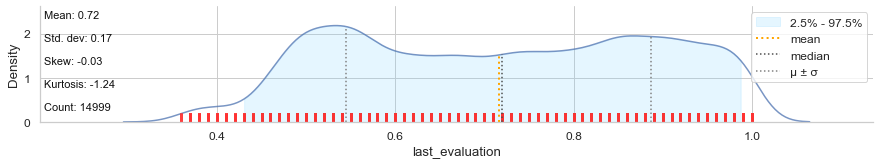

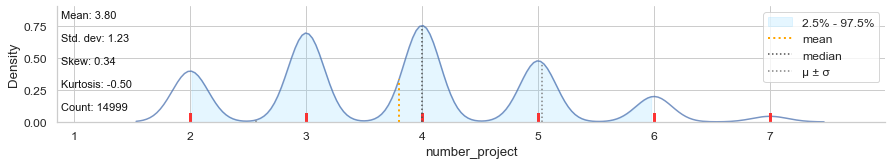

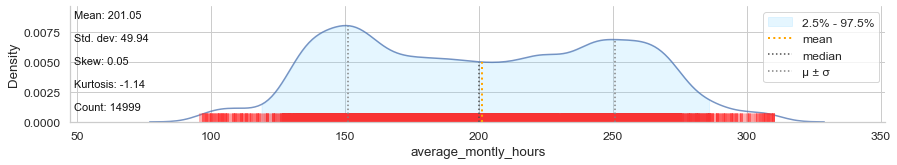

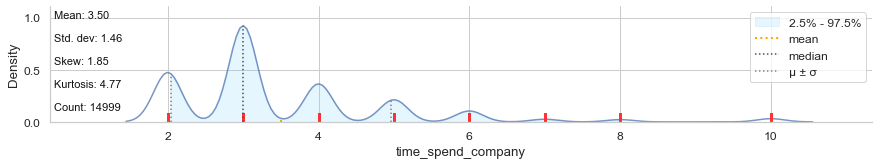

In [23]:
# returns a distribution plot for every numeric feature
klib.dist_plot(data_num)

##	Analyzing Categorical Variables 

### Selecting categorical variables

In [43]:
# Category colums
cat_cols = data.select_dtypes(include=['category']).columns.tolist()
cat_cols

['department', 'salary']

In [25]:
# Category colums
data_cat = data[cat_cols]
data_cat

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


### Most frequent entry

salary        0.487766
department    0.276018
dtype: float64

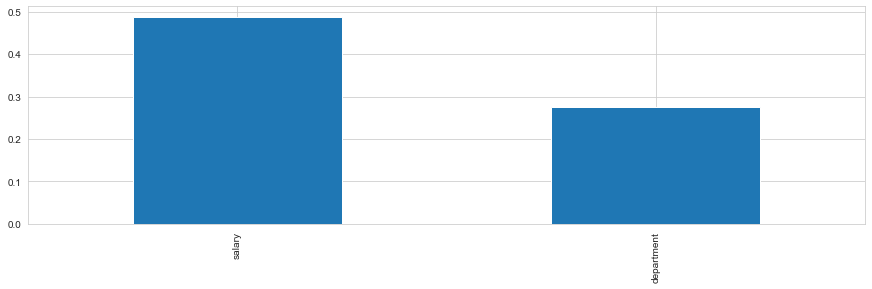

In [40]:
# Calculate and visualizate the ratio of the most frequent entry for each feature

# Collects for each feature the most frequent entry
most_frequent_entry = data_cat.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = data_cat.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

### Visualization of categorical variables

GridSpec(6, 2)

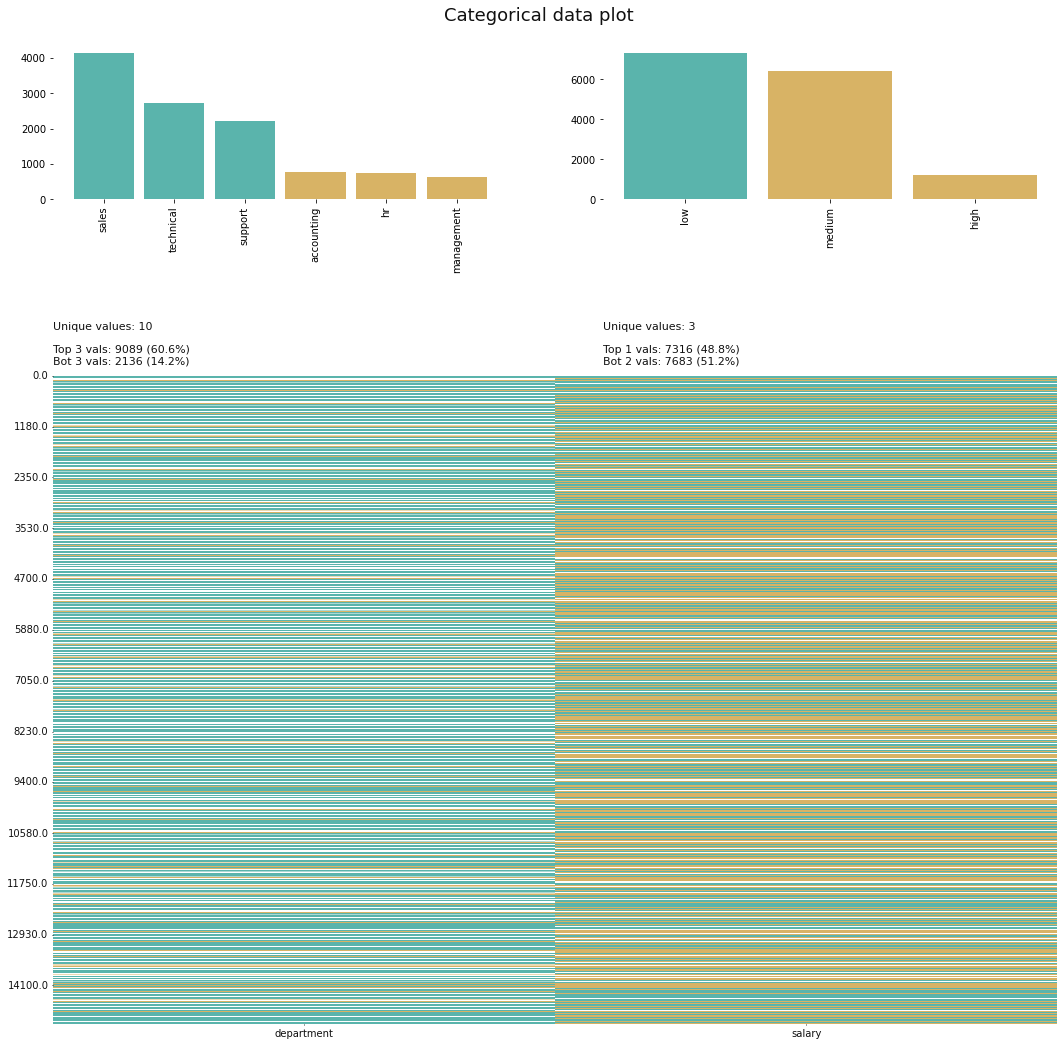

In [15]:
# returns a visualization of the number and frequency of categorical features
klib.cat_plot(data)

### Plot for each of non-numerical features the number of occurrences per unique value

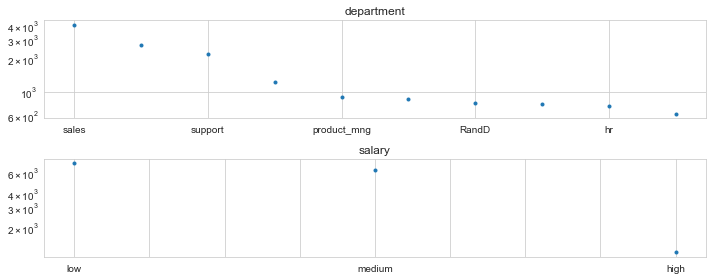

In [29]:
# Create figure object with 2 subplots
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(10, 4))

# Identify non-numerical features
df_non_numerical = data_cat

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

## Other plots with Plotly

https://plotly.com/python/plotly-express/

In [1]:
fig = px.violin(data, y="last_evaluation", box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

NameError: name 'px' is not defined

## <font color='green'>Data Save</font>

<font color='tomato'> Identificamos los datos a guardar</font>

In [7]:
data_to_save = data

<font color='tomato'>Extensión añadida al nombre del fichero: será el número del proceso que lo genera (e.g. diabetes_06).</font>

<font color='tomato'>En caso de generarse varios ficheros llevarán _01 _02 ... después (e.g. diabetes_06_01).</font>

In [8]:
# Proceso 07
extension='_07'

<font color='tomato'><b> OPCION A:</b> Uso de la librería "easygui" para mayor comodidad</font>

In [11]:
# Guardamos el fichero
file_save=basename(file_data).replace('.csv',extension+'.csv')
path_save="Data/Output/"+file_save
path_out=GUI.filesavebox(title='Save Data File',default=path_save)
data_to_save.to_csv(path_out, index=False)
print('Falie saved as:')
path_out

Falie saved as:


<font color='tomato'><b> OPCION B:</b> Uso del código que va a Pilot Deploy</font>

In [10]:
file_save=basename(file_name).replace('.csv',extension+'.csv')
data_to_save.to_csv('Data/Output/' + file_save, index=False)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

Ejemplos
- Se han modificado los nombres de las columnas
- Se han eliminado blancos en los nombres de las columnas
- Se han traducido los nombres de las columnas

## <font color=' #2874a6 '>Main Conclusions</font>

Ejemplos
- Los nombre de las columnas de origen son muy largos lo que provoca que ...
- ......

## <font color='RED'>CODE TO DEPLOY</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- xxxxxx
- xxxxxx
- xxxxxx

<font color=' red '><b>CODE</b></font>

In [1]:
# 
